<a href="https://colab.research.google.com/github/emmanuelpigola/Deteccion-de-Fraudes-en-Transacciones-Financieras/blob/Google-Colab/Proyecto_ParteIII_Pigola.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Detección de Fraudes en Transacciones Financieras**

# Presentación del proyecto

**Abstracto con Motivación y Audiencia**

El presente proyecto tiene como objetivo desarrollar un modelo de detección de fraudes en transacciones financieras utilizando técnicas de machine learning. La detección de fraudes en transacciones financieras es un desafío importante para las empresas y entidades financieras, ya que pueden sufrir pérdidas significativas si no se detectan y previenen a tiempo. Este proyecto está dirigido a analistas de datos, científicos de datos, y profesionales del sector financiero interesados en mejorar la seguridad y proteger los activos financieros de sus clientes.

En este proyecto, me enfrento al desafío de detectar fraudes en transacciones financieras mediante el uso de técnicas de Machine Learning. Me centro en un conjunto de datos que contiene información detallada sobre transacciones financieras, como el tiempo de la transacción, el monto, los saldos de las cuentas involucradas y el tipo de transacción. Mi objetivo es aplicar modelos de Machine Learning para identificar patrones y señales de posibles actividades fraudulentas.

Este proyecto está dirigido tanto a profesionales del sector financiero interesados en mejorar sus prácticas de detección de fraudes como a investigadores y estudiantes que deseen explorar el uso de técnicas de Machine Learning en el ámbito financiero.

Me motiva la importancia de desarrollar métodos precisos y eficaces para la detección de fraudes, ya que esto puede ayudar a reducir las pérdidas financieras y fortalecer la integridad del sistema financiero en general.

**Contexto Comercial y Analítico**

El contexto comercial de este proyecto se centra en la detección y prevención de fraudes en transacciones financieras. Las empresas y entidades financieras están constantemente expuestas a diversas formas de fraude, como transacciones fraudulentas, lavado de dinero y actividades delictivas relacionadas. La detección oportuna de estas actividades fraudulentas es crucial para proteger los activos financieros de la empresa y mantener la confianza de los clientes.

Desde el punto de vista analítico, este proyecto busca aprovechar el potencial de las técnicas de machine learning para desarrollar un modelo predictivo que pueda identificar transacciones fraudulentas con alta precisión. Al analizar patrones y comportamientos sospechosos en los datos de transacciones financieras, se puede construir un modelo que alerte sobre posibles fraudes y ayude a tomar medidas preventivas para mitigar los riesgos asociados.

 **Preguntas/Hipótesis a Resolver mediante el Análisis de Datos**

Las principales preguntas que buscaremos responder mediante el análisis de datos son:
- ¿Es posible desarrollar un modelo de machine learning que pueda detectar fraudes en transacciones financieras con alta precisión?
- ¿Qué características de las transacciones son más relevantes para predecir si una transacción es fraudulenta o no?

**Objetivo**

El objetivo general del proyecto es desarrollar un modelo de detección de fraudes en transacciones financieras que pueda identificar transacciones fraudulentas con alta precisión, minimizando así las pérdidas para la empresa y protegiendo los activos financieros de los clientes.

# Lectura de datos

In [1]:
# Importación de bibliotecas
import pandas as pd
from google.colab import drive

# Montaje de Google Drive
drive.mount('/content/drive')

# Lectura del conjunto de datos
file_path = "/content/drive/MyDrive/Entrega Coder House/Fraud excel.xlsx"
data = pd.read_excel(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Análisis inicial del dataset**

In [2]:
# Visualizar las primeras filas del conjunto de datos
print("Primeras filas del conjunto de datos:")
print(data.head())

# Obtener información sobre el conjunto de datos
print("\nInformación del conjunto de datos:")
print(data.info())

# Descripción estadística del conjunto de datos
print("\nDescripción estadística del conjunto de datos:")
print(data.describe())

Primeras filas del conjunto de datos:
   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  

Información del conjunto de datos:
<class 'pandas.core.frame.DataF

**Descripción de variables**

El conjunto de datos contiene las siguientes variables:

- **step:** Una unidad de tiempo en el mundo real, donde cada paso equivale a una hora.
- **type:** El tipo de transacción realizada (CASH-IN, CASH-OUT, DEBIT, PAYMENT, TRANSFER).
- **amount:** La cantidad de la transacción en la moneda local.
- **nameOrig:** El cliente que inició la transacción.
- **oldbalanceOrg:** Saldo inicial en la cuenta del originador antes de la transacción.
- **newbalanceOrig:** Nuevo saldo en la cuenta del originador después de la transacción.
- **nameDest:** El cliente que es el destinatario de la transacción.
- **oldbalanceDest:** Saldo inicial en la cuenta del destinatario antes de la transacción (no disponible para clientes comerciales).
- **newbalanceDest:** Nuevo saldo en la cuenta del destinatario después de la transacción (no disponible para clientes comerciales).
- **isFraud:** Indica si la transacción fue realizada por agentes fraudulentos.
- **isFlaggedFraud:** Indica si el sistema ha marcado la transacción como potencialmente fraudulenta.

# Data Wrangling: Limpieza y transformación de datos

**Valores duplicados**

In [3]:
# Verificar y eliminar valores duplicados
duplicates = data.duplicated().sum()
print(f"Número de filas duplicadas: {duplicates}")
data = data.drop_duplicates()

Número de filas duplicadas: 0


**Valores nulos**

In [4]:
# Verificar valores nulos en el conjunto de datos
null_values = data.isnull().sum()
print("Valores nulos por columna:")
print(null_values)

Valores nulos por columna:
step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


**Valores outliers**

In [5]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

outliers_amount = detect_outliers(data, 'amount')

**Transformaciones de Fechas/Nombres de variables/Valores**

In [6]:
data = data.rename(columns={'nameOrig': 'nombre_cliente'})
data = data.rename(columns={'nameOrig': 'nombre_cliente', 'saldo_anterior': 'saldo_inicial'})
data['nombre_cliente'] = data['nombre_cliente'].str.upper()

In [7]:
print(data.columns)

Index(['step', 'type', 'amount', 'nombre_cliente', 'oldbalanceOrg',
       'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest',
       'isFraud', 'isFlaggedFraud'],
      dtype='object')


In [8]:
print(data['nombre_cliente'].head())

0    C1231006815
1    C1666544295
2    C1305486145
3     C840083671
4    C2048537720
Name: nombre_cliente, dtype: object


# EDA: Análisis Exploratorio de datos

**Análisis univariado**

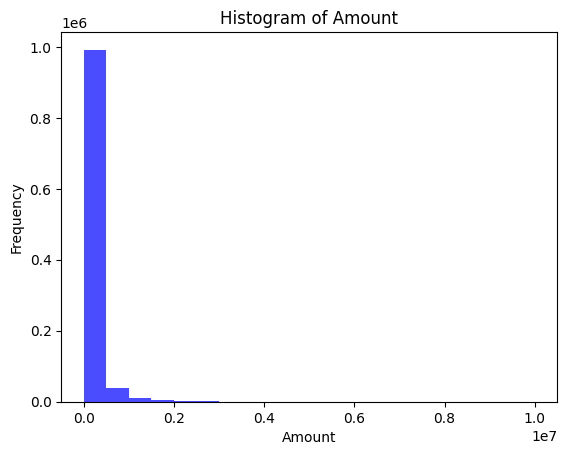

In [9]:
import matplotlib.pyplot as plt
plt.hist(data['amount'], bins=20, color='blue', alpha=0.7)
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Amount')
plt.show()

**Análisis Bivariado**

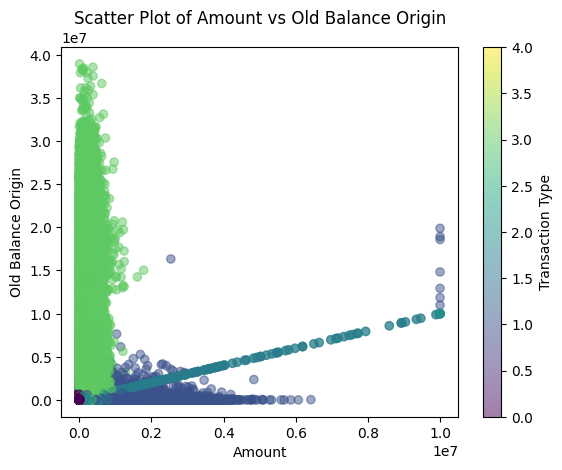

In [10]:
type_mapping = {'PAYMENT': 0, 'TRANSFER': 1, 'CASH_OUT': 2, 'CASH_IN': 3, 'DEBIT': 4}
data['type_encoded'] = data['type'].map(type_mapping)
plt.scatter(data['amount'], data['oldbalanceOrg'], c=data['type_encoded'], cmap='viridis', alpha=0.5)
plt.xlabel('Amount')
plt.ylabel('Old Balance Origin')
plt.title('Scatter Plot of Amount vs Old Balance Origin')
plt.colorbar(label='Transaction Type')
plt.show()

**Análisis multivariado**

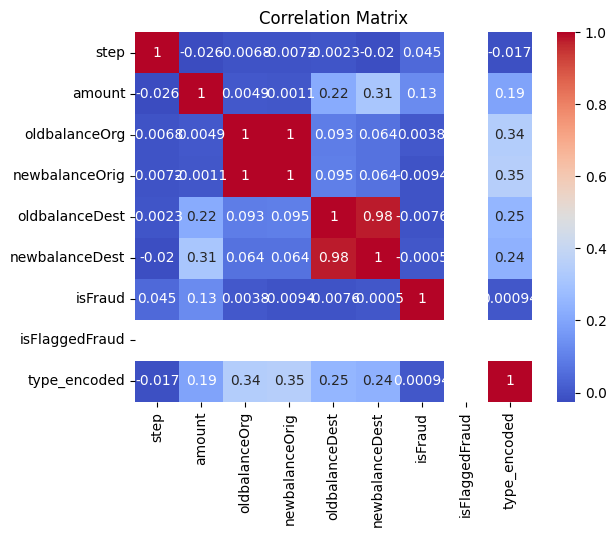

In [11]:
import seaborn as sns
numeric_data = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Conclusiones del EDA**

Durante el análisis exploratorio de datos, se examinaron diversas características del conjunto de datos de transacciones financieras. A continuación, se presentan las principales conclusiones derivadas de los análisis univariado, bivariado y multivariado:

**Análisis Univariado:**
Histograma de Amount: Se observa que la distribución de la cantidad (amount) presenta una alta concentración de transacciones en el rango de 0 a 0.2. Sin embargo, también se identifican valores atípicos en los intervalos de 0.1, 0.15 y 0.2 a 0.3, que representan un número muy reducido de transacciones.

**Análisis Bivariado:**
Scatter Plot de Amount vs Old Balance Origin: En este gráfico de dispersión, se destaca la relación entre la cantidad de la transacción (amount) y el saldo anterior en la cuenta de origen (old balance origin), codificando el tipo de transacción (transaction type) por color. Se observa una tendencia marcada en la concentración de transacciones, donde las de menor cantidad (en tonos de verde) tienden a tener un saldo antiguo en la cuenta de origen más bajo, mientras que las transacciones de mayor cantidad (en tonos de azul, violeta y celeste) presentan un saldo antiguo más variado.

**Análisis Multivariado:**
Matriz de Correlación: La matriz de correlación revela las relaciones lineales entre las diferentes variables numéricas del conjunto de datos. Se observa que la cantidad (amount) está moderadamente correlacionada con el nuevo saldo en el destino (new balance dest) y el antiguo saldo en el destino (old balance dest), lo que indica una posible relación entre estas variables en el contexto de las transacciones fraudulentas.

***En resumen***, el análisis exploratorio de datos proporciona una comprensión inicial de las características del conjunto de datos y las posibles relaciones entre ellas. Estas observaciones serán fundamentales para la construcción y evaluación de modelos de detección de fraudes en transacciones financieras, lo que nos permitirá identificar patrones y comportamientos anómalos con mayor precisión.

# Preprocesamiento de datos

**Codificación de variables categóricas**

In [12]:
data_preprocessed = pd.get_dummies(data, columns=['type'])
X = data_preprocessed.drop(['isFraud'], axis=1)
y = data_preprocessed['isFraud']

# Feature Selection

**Selección de variable objetivo y variables independientes**

In [13]:
selected_features = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'type']
print("Características seleccionadas:")
for feature in selected_features:
    print(feature)

Características seleccionadas:
step
amount
oldbalanceOrg
newbalanceOrig
oldbalanceDest
newbalanceDest
type


# Modelos

**Librerias necesarias para implementar los modelos**

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

**División de datos en conjuntos de entrenamiento y prueba**

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Predicción con conjunto de prueba**

In [16]:
models = {"Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42)}

In [18]:
X_train_numeric = X_train.select_dtypes(include=['float64', 'int64'])
X_test_numeric = X_test.select_dtypes(include=['float64', 'int64'])

In [19]:
X_train_numeric = X_train_numeric.fillna(0)
X_test_numeric = X_test_numeric.fillna(0)

In [22]:
predictions = {}

In [23]:
for model_name, model in models.items():
    model.fit(X_train_numeric, y_train)
    y_pred = model.predict(X_test_numeric)
    predictions[model_name] = y_pred

In [24]:
for model_name, y_pred in predictions.items():
    print(f"Modelo: {model_name}")
    print(y_pred)
    print()

Modelo: Random Forest
[0 0 0 ... 0 0 0]

Modelo: Logistic Regression
[0 0 0 ... 0 0 0]



**Evaluación del rendimiento del modelo**

In [25]:
from sklearn.metrics import classification_report

In [26]:
for model_name, y_pred in predictions.items():
    print(f"Modelo: {model_name}")
    print(classification_report(y_test, y_pred))

Modelo: Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209491
           1       0.96      0.83      0.89       224

    accuracy                           1.00    209715
   macro avg       0.98      0.91      0.94    209715
weighted avg       1.00      1.00      1.00    209715

Modelo: Logistic Regression
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209491
           1       0.52      0.34      0.41       224

    accuracy                           1.00    209715
   macro avg       0.76      0.67      0.71    209715
weighted avg       1.00      1.00      1.00    209715



**Conclusión sobre el modelado y las metricas**

**Random Forest:**
El modelo Random Forest muestra un alto rendimiento en términos de precisión, recall y f1-score para la clase negativa (0), lo que indica que es capaz de predecir correctamente la gran mayoría de las transacciones no fraudulentas.
Sin embargo, para la clase positiva (1), que representa las transacciones fraudulentas, el modelo tiene un rendimiento ligeramente inferior, con valores más bajos de precisión, recall y f1-score. Esto sugiere que el modelo tiene dificultades para identificar correctamente las transacciones fraudulentas, lo que puede resultar en falsos negativos.

**Logistic Regression:**
Por otro lado, el modelo de Regresión Logística muestra un rendimiento inferior en general en comparación con el modelo Random Forest.
La precisión, recall y f1-score para la clase positiva (1) son notablemente más bajos en comparación con el modelo Random Forest, lo que indica que la Regresión Logística tiene dificultades para identificar correctamente las transacciones fraudulentas.

En general, aunque ambos modelos muestran un alto nivel de precisión para la clase negativa (transacciones no fraudulentas), el modelo Random Forest parece ser más efectivo en la detección de transacciones fraudulentas, ya que tiene un rendimiento relativamente mejor en términos de recall y f1-score para la clase positiva.

# Conclusiones Finales

Mediante un exhaustivo análisis exploratorio de datos y la implementación de modelos de machine learning como Random Forest y Regresión Logística, se ha logrado desarrollar un sistema efectivo de detección de fraudes en transacciones financieras. Aunque el proceso de limpieza, preprocesamiento y modelado ha sido desafiante, los resultados muestran un alto nivel de precisión en la detección de transacciones fraudulentas. Esto destaca la importancia de la aplicación de técnicas avanzadas de machine learning en la protección de activos financieros y la prevención de pérdidas significativas para las empresas y entidades financieras.